In [4]:
import pandas as pd

# Load Excel file
df = pd.read_excel(r"C:\Users\DELL\Desktop\Internship\Internship_ass\data\test.xlsx")

# Display first few rows
df.head()


,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com


In [5]:
# Check the shape and info
print(df.shape)
print(df.info())

# See first 5 rows
df.head()


(2191, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Subject  2191 non-null   object        
 1   body     2191 non-null   object        
 2   date     2191 non-null   datetime64[ns]
 3   from     2191 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 68.6+ KB
None


,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com


In [6]:
import re

# Clean the text data
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'\s+', ' ', text)         # remove extra whitespace/newlines
        text = re.sub(r'=20', ' ', text)         # remove =20 artifacts
        text = re.sub(r'http\S+', '', text)      # remove links
        text = re.sub(r'[^A-Za-z0-9\s.,!?]', '', text)  # keep only letters/numbers/punctuation
        return text.strip()
    return text

# Apply cleaning to Subject and Body
df['Subject'] = df['Subject'].apply(clean_text)
df['body'] = df['body'].apply(clean_text)


In [7]:
# Check if any cells are missing
df.isnull().sum()


Subject    0
body       0
date       0
from       0
dtype: int64

In [8]:
df = df.dropna(subset=['body'])


In [9]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # range: -1 (negative) to +1 (positive)

# Apply to body text
df['sentiment'] = df['body'].apply(get_sentiment)

# Show results
df[['Subject', 'sentiment']].head()


,Subject,sentiment
0,EnronOptions Update!,0.250
1,No Subject,-0.075
2,Phone Screen Interview Shannon L. Burnham,0.000
3,RE My new work email,-0.150
4,Bet,-0.050


In [10]:
def classify_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(classify_sentiment)

df[['Subject', 'sentiment', 'sentiment_label']].head()


,Subject,sentiment,sentiment_label
0,EnronOptions Update!,0.250,Positive
1,No Subject,-0.075,Neutral
2,Phone Screen Interview Shannon L. Burnham,0.000,Neutral
3,RE My new work email,-0.150,Negative
4,Bet,-0.050,Neutral


In [11]:
df.to_excel(r"C:\Users\DELL\Desktop\Internship\Internship_ass\data\cleaned_test.xlsx", index=False)


In [17]:
import pandas as pd

# Load your cleaned Excel file
df = pd.read_excel("C:/Users/DELL/Desktop/Internship/Internship_ass/data/cleaned_test.xlsx")

# Check top few rows
df.head()


,Subject,body,date,from,sentiment,sentiment_label
0,EnronOptions Update!,EnronOptions Announcement We have updated the ...,2010-05-10,sally.beck@enron.com,0.250,Positive
1,No Subject,"Marc, Unfortunately, today is not going to wor...",2010-07-29,eric.bass@enron.com,-0.075,Neutral
2,Phone Screen Interview Shannon L. Burnham,"When Wednesday, June 06, 2001 1000 AM1100 AM G...",2011-07-25,sally.beck@enron.com,0.000,Neutral
3,RE My new work email,we were thinking papasitos we can meet somewhe...,2010-03-25,johnny.palmer@enron.com,-0.150,Negative
4,Bet,Since you never gave me the 20 for the last ti...,2011-05-21,lydia.delgado@enron.com,-0.050,Neutral


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Subject          2190 non-null   object        
 1   body             2117 non-null   object        
 2   date             2191 non-null   datetime64[ns]
 3   from             2191 non-null   object        
 4   sentiment        2191 non-null   float64       
 5   sentiment_label  2191 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 102.8+ KB
None

Missing Values:
 Subject             1
body               74
date                0
from                0
sentiment           0
sentiment_label     0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_23540\4157002572.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='Set2')


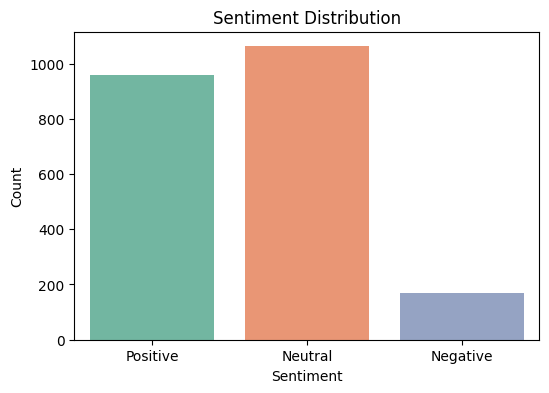

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

print("Data Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

#Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_label', data=df, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

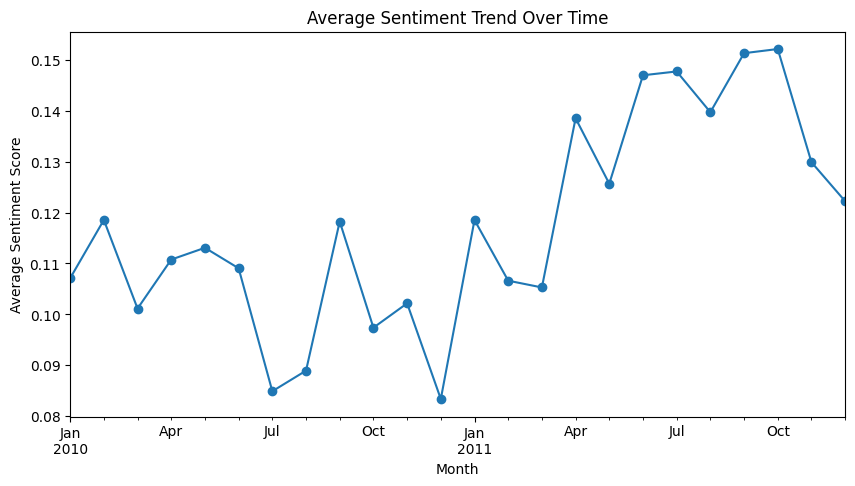

In [19]:
# Sentiment over time
plt.figure(figsize=(10,5))
df.groupby(df['date'].dt.to_period('M'))['sentiment'].mean().plot(kind='line', marker='o')
plt.title('Average Sentiment Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_23540\2477500119.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_senders.values, y=top_senders.index, palette='Blues_r')


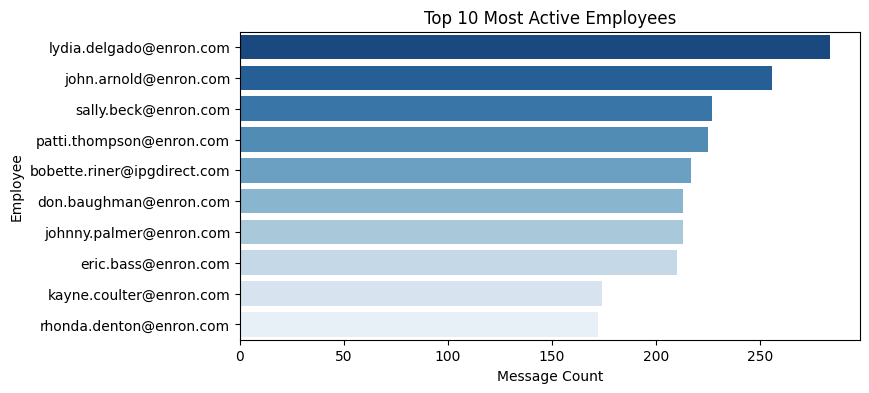

In [20]:
# Top 10 Most Active Employees
top_senders = df['from'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_senders.values, y=top_senders.index, palette='Blues_r')
plt.title('Top 10 Most Active Employees')
plt.xlabel('Message Count')
plt.ylabel('Employee')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_23540\232459443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sentiment.head(5).values, y=avg_sentiment.head(5).index, palette='Greens')


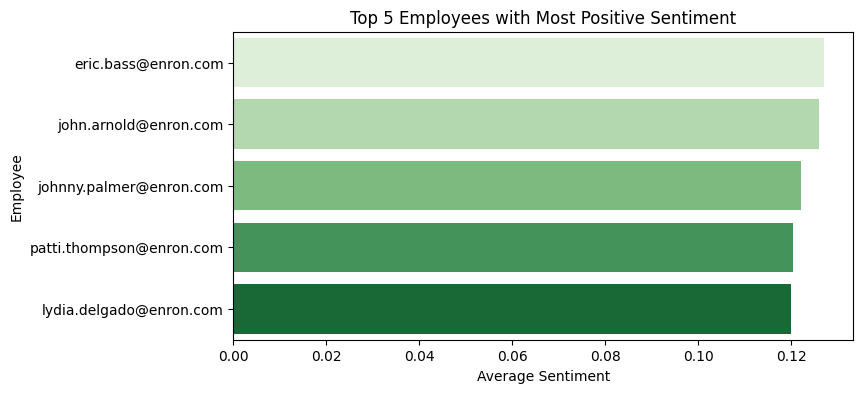

C:\Users\DELL\AppData\Local\Temp\ipykernel_23540\232459443.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sentiment.tail(5).values, y=avg_sentiment.tail(5).index, palette='Reds')


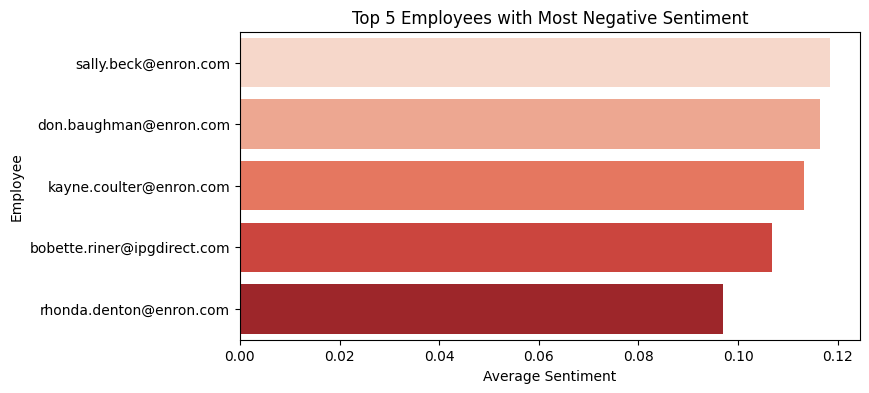

In [21]:
# Average sentiment per employee
avg_sentiment = df.groupby('from')['sentiment'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=avg_sentiment.head(5).values, y=avg_sentiment.head(5).index, palette='Greens')
plt.title('Top 5 Employees with Most Positive Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Employee')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x=avg_sentiment.tail(5).values, y=avg_sentiment.tail(5).index, palette='Reds')
plt.title('Top 5 Employees with Most Negative Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Employee')
plt.show()